### `---------------Mandatory Information to fill------------`

### Group ID: 134
### Group Members Name with Student ID:
1. CHAKSHU
2. AASHAANK PRATAP
3. GALI JAHNAVI
4. SHIVAM SAHIL


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Problem Statement

Develop a reinforcement learning agent using dynamic programming methods to solve the Dice game optimally. The agent will learn the optimal policy by iteratively evaluating and improving its strategy based on the state-value function and the Bellman equations.

# Scenario:
A player rolls a 6-sided die with the objective of reaching a score of **exactly** 100. On each turn, the player can choose to stop and keep their current score or continue rolling the die. If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If the player rolls any other number (2-6), that number is added to their score for that turn. The game ends when the player decides to stop and keep their score OR when the player's score reaches 100. The player wins if they reach a score of exactly 100, and loses if they roll a 1 when their score is below 100.



#Environment Details

* The environment consists of a player who can choose to either roll a 6-sided die or stop at any point.
* The player starts with an initial score (e.g., 0) and aims to reach a score of exactly 100.
* If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If they roll any other number (2-6), that number is added to their score for that turn.
* The goal is to accumulate a total of exactly 100 points to win, or to stop the game before reaching 100 points.

#### States
* State s: Represents the current score of the player, ranging from 0 to 100.
* Terminal States:
    * State s = 100: Represents the player winning the game by reaching the goal of 100 points.
    * State s = 0: Represents the player losing all points accumulated in the turn due to rolling a 1.


#### Actions
* Action a: Represents the decision to either "roll" the die or "stop" the game at the current score.
* The possible actions in any state s are either "roll" or "stop".


# Expected Outcomes:
1.	Use dynamic programming methods value iteration, policy improvement and policy evaluation to find the optimal policy for the Dice Game.
2.	Implement an epsilon-greedy policy for action selection during training to balance exploration and exploitation.
3.	Evaluate the agent's performance in terms of the probability of reaching exactly 100 points after learning the optimal policy.
4.	Use the agent's policy as the best strategy for different betting scenarios within the problem.


# Code Execution

### Initialize constants

In [34]:
# Constants
import numpy as np
# Constants
goal = 100
gamma = 1.0  # Discount factor
prob_roll = 1/6  # Probability of rolling any number between 1 and 6
# Since we have varied dice faces so won't be using it anywhere instead computing it dynamically at run time.

# Initialize value function and policy
V = np.zeros(goal + 1)  # Value function initialized to zero for each possible score from 0 to 100
policy = np.zeros(goal + 1, dtype=int)  # Policy array where 0 means "stop", 1 means "roll"

# Design a DiceGame Environment (1M)

In [35]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------

class DiceGameEnvironment:
    def __init__(self, goal=100, sides=6):
        self.goal = goal  # The target score to win the game
        self.sides = sides  # Number of sides on the die
        self.current_score = 0  # Initial score at the start of the game

    def roll_die(self):
        """Simulate rolling the die and return the result as an integer between 1 and the number of sides."""
        return np.random.randint(1, self.sides + 1)

    def reset(self):
        """Reset the environment to the initial state."""
        self.current_score = 0  # Reset the score to 0
        return self.current_score  # Return the initial state

    def step(self, current_score, action):
        """
        Take an action from the current score and return the new score and the reward.
        Parameters:
            current_score (int): The current score of the player.
            action (str): 'roll' or 'stop' indicating the player's action.
        Returns:
            tuple: A tuple containing the new score and the reward obtained.
        """
        if action == "stop":
            return current_score, self.calculate_reward(current_score, current_score, action)
        elif action == "roll":
            roll = self.roll_die()
            if roll == 1:
                return 0, self.calculate_reward(current_score, 0, action)
            new_score = current_score + roll
            if new_score > self.goal:
                return new_score, self.calculate_reward(current_score, 0, action)
            elif new_score == self.goal:
                return new_score, 100  # Large reward for winning
            else:
                return new_score, 0  # Continue with the new score

    def calculate_reward(self, old_score, new_score, action):
        if action == "stop":
            if new_score == self.goal:
                return 100  # Large reward for winning
            else:
                return -1  # Small penalty for stopping without winning
        elif new_score == 0:
            return -old_score  # Penalty for rolling a 1
        elif new_score > self.goal:
            return -100  # Large penalty for exceeding the goal
        else:
            return 0  # No immediate reward for other rolls

    def is_terminal(self, score):
        """Check if the given score is a terminal state."""
        return score == 0 or score >= self.goal



### Define reward funtion

In [36]:
#Calculate reward function for 'stop' and 'roll' actions
#-----write your code below this line---------
class DiceGameEnvironment:
    def __init__(self, goal=100, sides=6):
        self.goal = goal  # The target score to win the game
        self.sides = sides  # Number of sides on the die
        self.current_score = 0  # Initial score at the start of the game

    def roll_die(self):
        """Simulate rolling the die and return the result as an integer between 1 and the number of sides."""
        return np.random.randint(1, self.sides + 1)

    def reset(self):
        """Reset the environment to the initial state."""
        self.current_score = 0  # Reset the score to 0
        return self.current_score  # Return the initial state

    def step(self, current_score, action):
        """
        Take an action from the current score and return the new score and the reward.
        Parameters:
            current_score (int): The current score of the player.
            action (str): 'roll' or 'stop' indicating the player's action.
        Returns:
            tuple: A tuple containing the new score and the reward obtained.
        """
        if action == "stop":
            return current_score, self.calculate_reward(current_score, current_score, action)
        elif action == "roll":
            roll = self.roll_die()
            if roll == 1:
                return 0, self.calculate_reward(current_score, 0, action)
            new_score = current_score + roll
            if new_score > self.goal:
                return new_score, self.calculate_reward(current_score, 0, action)
            elif new_score == self.goal:
                return new_score, 100  # Large reward for winning
            else:
                return new_score, 0  # Continue with the new score

    def calculate_reward(self, old_score, new_score, action):
        if action == "stop":
            if new_score == self.goal:
                return 100  # Large reward for winning
            else:
                return -1  # Small penalty for stopping without winning
        elif new_score == 0:
            return -old_score  # Penalty for rolling a 1
        elif new_score > self.goal:
            return -100  # Large penalty for exceeding the goal
        else:
            return 0  # No immediate reward for other rolls

    def is_terminal(self, score):
        """Check if the given score is a terminal state."""
        return score == 0 or score >= self.goal


# Policy Iteration Function Definition (0.5M)

In [37]:
#For each state, Store old_policy of state s.
#Determine best_action based on maximum reward. Update policy[s] to best_action.
#Return stable when old policy = policy[s]

#-----write your code below this line---------

def policy_evaluation(policy, env, gamma=1.0, threshold=0.01):
    V = np.zeros(env.goal + 1)  # Initialize value function
    iteration = 0
    while True:
        delta = 0
        for s in range(1, env.goal):  # Skip terminal state
            v = 0
            if policy[s] == 0:  # Stop
                v = env.calculate_reward(s, s, 'stop')
            elif policy[s] == 1:  # Roll
                for roll in range(1, env.sides + 1):
                    next_s = s + roll
                    if next_s > env.goal:
                        next_s = 0
                    prob = 1 / env.sides
                    v += prob * (env.calculate_reward(s, next_s, 'roll') + gamma * V[next_s])
            delta = max(delta, np.abs(V[s] - v))
            V[s] = v
        if delta < threshold:
            break
        iteration += 1
        if iteration % 100 == 0:
            print(f"Policy Evaluation Iteration {iteration}: delta={delta}")
    return V

def policy_improvement(V, env, gamma=1.0):
    policy = np.zeros(env.goal + 1, dtype=int)
    for s in range(1, env.goal):
        A = np.zeros(2)  # Store the expected returns for each action
        
        # Calculate stop action value
        A[0] = env.calculate_reward(s, s, 'stop')
        
        # Calculate roll action value
        for roll in range(1, env.sides + 1):
            next_s = s + roll
            if next_s > env.goal:
                next_s = 0
            prob = 1 / env.sides
            A[1] += prob * (env.calculate_reward(s, next_s, 'roll') + gamma * V[next_s])
        
        # Choose the best action
        best_action = np.argmax(A)
        policy[s] = best_action
        
        # Debugging output
        print(f"State {s}: Stop Value={A[0]}, Roll Value={A[1]}, Best Action={'Stop' if best_action == 0 else 'Roll'}")
        
    return policy

def policy_iteration(env, gamma=1.0):
    policy = np.random.choice([0, 1], size=(env.goal + 1))  # Random initial policy
    stable = False
    iteration = 0
    while not stable:
        print(f"Policy Iteration {iteration} Start")
        V = policy_evaluation(policy, env, gamma)
        new_policy = policy_improvement(V, env, gamma)
        
        # Debugging output to show policy changes
        for s in range(1, env.goal):
            if policy[s] != new_policy[s]:
                print(f"State {s} Policy Changed: {policy[s]} -> {new_policy[s]}")
        
        stable = np.array_equal(new_policy, policy)
        print(f"Policy Iteration {iteration}: Policy Stable={stable}")
        policy = new_policy
        iteration += 1
    return policy, V

# Test the updated policy iteration
env = DiceGameEnvironment(goal=100, sides=6)
policy_pi, V_pi = policy_iteration(env)
print("Policy Iteration Results:")
print("Policy:", policy_pi)
print("Value Function:", V_pi)




Policy Iteration 0 Start
State 1: Stop Value=-1.0, Roll Value=-0.9999999999999998, Best Action=Roll
State 2: Stop Value=-1.0, Roll Value=-0.9999999999999998, Best Action=Roll
State 3: Stop Value=-1.0, Roll Value=-0.9999999999999998, Best Action=Roll
State 4: Stop Value=-1.0, Roll Value=-0.9999999999999998, Best Action=Roll
State 5: Stop Value=-1.0, Roll Value=-0.9999999999999999, Best Action=Roll
State 6: Stop Value=-1.0, Roll Value=-0.9999999999999999, Best Action=Roll
State 7: Stop Value=-1.0, Roll Value=-0.9998487749580856, Best Action=Roll
State 8: Stop Value=-1.0, Roll Value=-0.9998487749580856, Best Action=Roll
State 9: Stop Value=-1.0, Roll Value=-0.9997242425252755, Best Action=Roll
State 10: Stop Value=-1.0, Roll Value=-0.99961876206625, Best Action=Roll
State 11: Stop Value=-1.0, Roll Value=-0.9996187620662499, Best Action=Roll
State 12: Stop Value=-1.0, Roll Value=-0.999521716074785, Best Action=Roll
State 13: Stop Value=-1.0, Roll Value=-0.9996729411166995, Best Action=Roll

# Value Iteration Function Definition (0.5M)

In [42]:
# Iterate over all states except terminal state untill convergence

# Calculate expected returns V(s) for current policy by considering all possible actions.

#If action is stop:
        #Calculate reward for stopping and append to rewards.
#If action is roll:
        #For each possible roll outcome (1 to 6), Determine next_s based on roll.

# Update V(s) using the Bellman equation.

#Determine max_reward from rewards
#With probability epsilon, randomly choose a reward from rewards.

#Check convergence if delta is less than a small threshold.

#-----write your code below this line---------

def value_iteration(env, gamma=1.0, threshold=0.01, epsilon=0.1):
    V = np.zeros(env.goal + 1)  # Initialize value function for all states
    
    iteration = 0
    while True:
        delta = 0
        for s in range(1, env.goal):  # Iterate over all states except the terminal state
            if env.is_terminal(s):
                continue
            
            # Initialize a list to store rewards for all actions
            stop_reward = env.calculate_reward(s, s, 'stop')
            expected_roll_value = 0
            for roll in range(1, env.sides + 1):
                next_s = s + roll
                if next_s > env.goal:
                    next_s = 0  # Reset if the score exceeds the goal
                expected_roll_value += (1 / env.sides) * (env.calculate_reward(s, next_s, 'roll') + gamma * V[next_s])
            
            # Choose the best expected reward
            max_reward = max(stop_reward, expected_roll_value)
            
            # Update the value table and calculate delta
            delta = max(delta, abs(V[s] - max_reward))
            V[s] = max_reward
            print(f"State {s}: V[s]={V[s]}, max_reward={max_reward}, delta={delta}")
        
        # Check for convergence
        if delta < threshold:
            break
        iteration += 1
        if iteration % 100 == 0:
            print(f"Value Iteration {iteration}: delta={delta}")
    
    # Extract the optimal policy based on the value function
    policy = np.zeros(env.goal + 1, dtype=int)
    for s in range(1, env.goal):
        if env.is_terminal(s):
            continue
        
        stop_value = env.calculate_reward(s, s, 'stop')
        roll_values = [(1 / env.sides) * (env.calculate_reward(s, s + roll, 'roll') + gamma * V[s + roll if s + roll <= env.goal else 0])
                       for roll in range(1, env.sides + 1)]
        best_action_value = max(stop_value, np.sum(roll_values))
        
        # Choose the action with the highest expected return
        policy[s] = 0 if stop_value >= best_action_value else 1

    return policy, V




# Executing Policy Iteration and Value Iteration Functions (1M)

Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)

In [43]:
#Simulate the game for 100 states. Use the learned policy to get the actions.
#when its roll, randomly generate a number to find the reward.
#when its stop, get the respective reward
#determine the total cumulative reward

#-----write your code below this line---------

def simulate_game(env, policy, num_simulations=100):
    cumulative_rewards = 0
    for i in range(num_simulations):
        state = env.reset()
        total_reward = 0
        steps = 0
        while not env.is_terminal(state):
            action = 'stop' if policy[state] == 0 else 'roll'
            old_state = state
            state, reward = env.step(state, action)
            total_reward += reward
            steps += 1
            if env.is_terminal(state):
                break
            if steps > 1000:  # Add a safeguard for runaway simulations
                print(f"Simulation {i} exceeded 1000 steps, breaking.")
                break
        cumulative_rewards += total_reward
        print(f"Simulation {i}: Total Reward = {total_reward}, Steps = {steps}")
    return cumulative_rewards


# Assuming env is an instance of DiceGameEnvironment
env = DiceGameEnvironment(goal=100, sides=6)

# Policy Iteration
policy_pi, V_pi = policy_iteration(env)
print("Policy Iteration Results:")
print("Policy:", policy_pi)
print("Value Function:", V_pi)
cumulative_rewards_pi = simulate_game(env, policy_pi, 100)
print("Total Cumulative Reward from Policy Iteration:", cumulative_rewards_pi)

# Value Iteration
policy_vi, V_vi = value_iteration(env)
print("Value Iteration Results:")
print("Policy:", policy_vi)
print("Value Function:", V_vi)
cumulative_rewards_vi = simulate_game(env, policy_vi, 100)
print("Total Cumulative Reward from Value Iteration:", cumulative_rewards_vi)


Policy Iteration 0 Start
State 1: Stop Value=-1.0, Roll Value=-0.998801958304755, Best Action=Roll
State 2: Stop Value=-1.0, Roll Value=-0.9987185563049328, Best Action=Roll
State 3: Stop Value=-1.0, Roll Value=-0.9991115363405811, Best Action=Roll
State 4: Stop Value=-1.0, Roll Value=-0.9994064119417768, Best Action=Roll
State 5: Stop Value=-1.0, Roll Value=-0.999556214700926, Best Action=Roll
State 6: Stop Value=-1.0, Roll Value=-0.9996619597706987, Best Action=Roll
State 7: Stop Value=-1.0, Roll Value=-0.9997601138196665, Best Action=Roll
State 8: Stop Value=-1.0, Roll Value=-0.9997965639500668, Best Action=Roll
State 9: Stop Value=-1.0, Roll Value=-0.9998560186772848, Best Action=Roll
State 10: Stop Value=-1.0, Roll Value=-0.9998201143065502, Best Action=Roll
State 11: Stop Value=-1.0, Roll Value=-0.9998765260101777, Best Action=Roll
State 12: Stop Value=-1.0, Roll Value=-0.9999171437598433, Best Action=Roll
State 13: Stop Value=-1.0, Roll Value=-0.9998886154136817, Best Action=Rol

### Print the Learned Optimal Policy, Optimal Value Function (0.5M)

In [44]:
#-----write your code below this line---------


def print_policy_and_values(policy, value_function, method_name):
    print(f"Results from {method_name}:")
    print("Optimal Policy (Action at each state):")
    for state in range(len(policy)):
        action = "Stop" if policy[state] == 0 else "Roll"
        print(f"State {state}: {action}")
    print("\nOptimal Value Function (Value at each state):")
    for state in range(len(value_function)):
        print(f"State {state}: {value_function[state]:.2f}")

# Assuming policy_pi, V_pi are from policy iteration and policy_vi, V_vi are from value iteration
print_policy_and_values(policy_pi, V_pi, "Policy Iteration")
print_policy_and_values(policy_vi, V_vi, "Value Iteration")

Results from Policy Iteration:
Optimal Policy (Action at each state):
State 0: Stop
State 1: Roll
State 2: Roll
State 3: Roll
State 4: Roll
State 5: Roll
State 6: Roll
State 7: Roll
State 8: Roll
State 9: Roll
State 10: Roll
State 11: Roll
State 12: Roll
State 13: Roll
State 14: Roll
State 15: Roll
State 16: Roll
State 17: Roll
State 18: Roll
State 19: Roll
State 20: Roll
State 21: Roll
State 22: Roll
State 23: Roll
State 24: Roll
State 25: Roll
State 26: Roll
State 27: Roll
State 28: Roll
State 29: Roll
State 30: Roll
State 31: Roll
State 32: Roll
State 33: Roll
State 34: Roll
State 35: Roll
State 36: Roll
State 37: Roll
State 38: Roll
State 39: Roll
State 40: Roll
State 41: Roll
State 42: Roll
State 43: Roll
State 44: Roll
State 45: Roll
State 46: Roll
State 47: Roll
State 48: Roll
State 49: Roll
State 50: Roll
State 51: Roll
State 52: Roll
State 53: Roll
State 54: Roll
State 55: Roll
State 56: Roll
State 57: Roll
State 58: Roll
State 59: Roll
State 60: Roll
State 61: Roll
State 62: 

# Change in environment details (1M)

Consider the following scenario:
1. What happens if we change the goal score to 50 instead of 100? How does it affect the optimal policy and value function?
2. How would the optimal policy and value function change if the die had 8 sides instead of 6? Assume the outcomes range from 0 to 7, with each outcome having a probability of 1/8.
3. Experiment with different discount factors (e.g., 0.9, 0.95). How does discounting future rewards impact the optimal policy and value function?
4. Create a heatmap or line plot to visualize the value function over different states. How does the value function change as the state approaches the goal?


State 1: V[s]=0.0, max_reward=0.0, delta=0
State 2: V[s]=0.0, max_reward=0.0, delta=0
State 3: V[s]=0.0, max_reward=0.0, delta=0
State 4: V[s]=0.0, max_reward=0.0, delta=0
State 5: V[s]=0.0, max_reward=0.0, delta=0
State 6: V[s]=0.0, max_reward=0.0, delta=0
State 7: V[s]=0.0, max_reward=0.0, delta=0
State 8: V[s]=0.0, max_reward=0.0, delta=0
State 9: V[s]=0.0, max_reward=0.0, delta=0
State 10: V[s]=0.0, max_reward=0.0, delta=0
State 11: V[s]=0.0, max_reward=0.0, delta=0
State 12: V[s]=0.0, max_reward=0.0, delta=0
State 13: V[s]=0.0, max_reward=0.0, delta=0
State 14: V[s]=0.0, max_reward=0.0, delta=0
State 15: V[s]=0.0, max_reward=0.0, delta=0
State 16: V[s]=0.0, max_reward=0.0, delta=0
State 17: V[s]=0.0, max_reward=0.0, delta=0
State 18: V[s]=0.0, max_reward=0.0, delta=0
State 19: V[s]=0.0, max_reward=0.0, delta=0
State 20: V[s]=0.0, max_reward=0.0, delta=0
State 21: V[s]=0.0, max_reward=0.0, delta=0
State 22: V[s]=0.0, max_reward=0.0, delta=0
State 23: V[s]=0.0, max_reward=0.0, delta

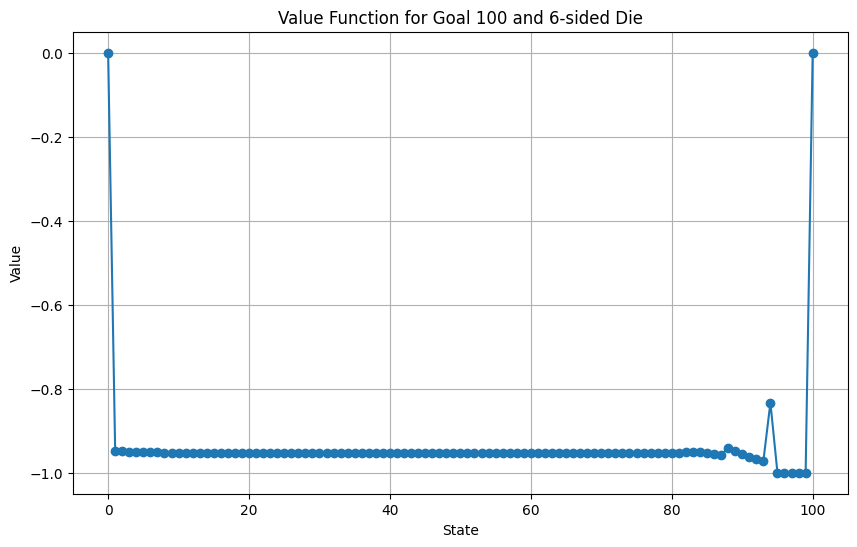

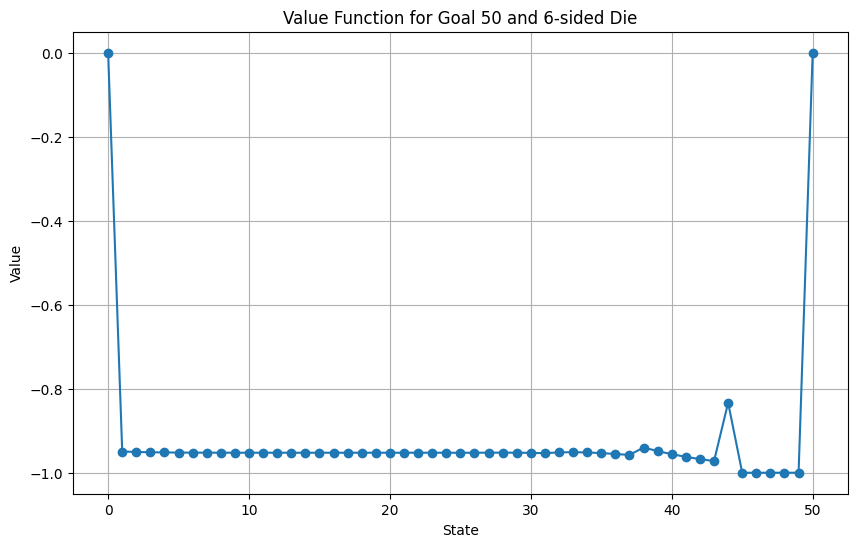

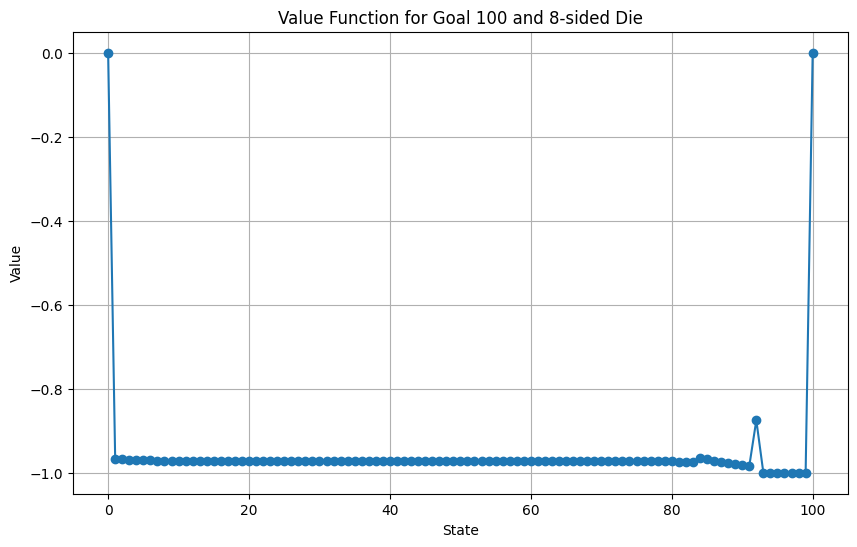

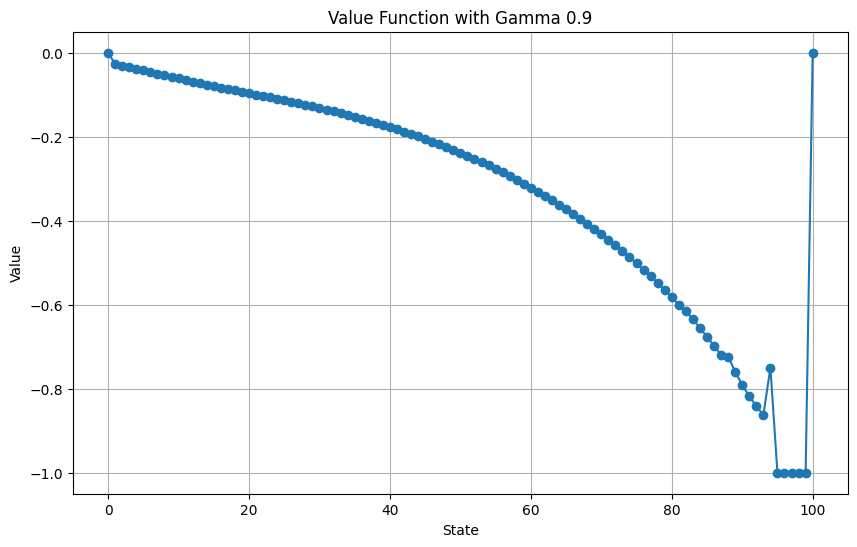

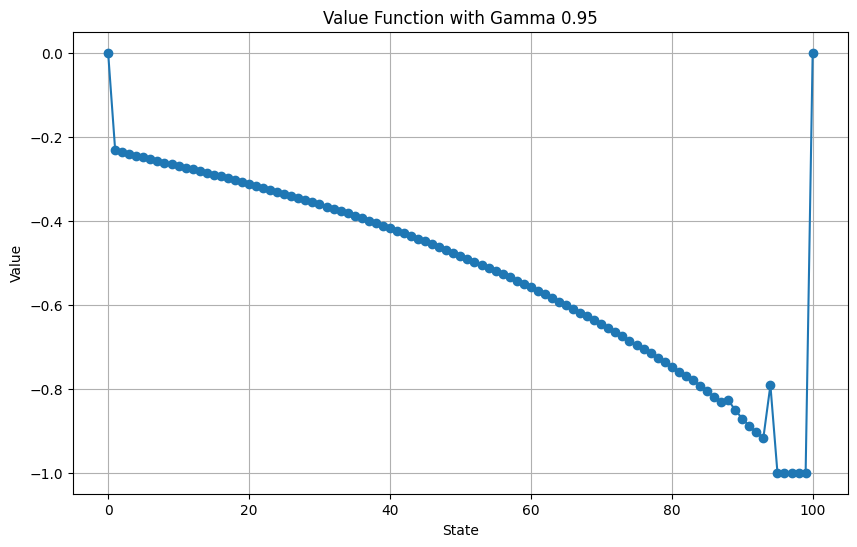

State 1: V[s]=0.0, max_reward=0.0, delta=0
State 2: V[s]=0.0, max_reward=0.0, delta=0
State 3: V[s]=0.0, max_reward=0.0, delta=0
State 4: V[s]=0.0, max_reward=0.0, delta=0
State 5: V[s]=0.0, max_reward=0.0, delta=0
State 6: V[s]=0.0, max_reward=0.0, delta=0
State 7: V[s]=0.0, max_reward=0.0, delta=0
State 8: V[s]=0.0, max_reward=0.0, delta=0
State 9: V[s]=0.0, max_reward=0.0, delta=0
State 10: V[s]=0.0, max_reward=0.0, delta=0
State 11: V[s]=0.0, max_reward=0.0, delta=0
State 12: V[s]=0.0, max_reward=0.0, delta=0
State 13: V[s]=0.0, max_reward=0.0, delta=0
State 14: V[s]=0.0, max_reward=0.0, delta=0
State 15: V[s]=0.0, max_reward=0.0, delta=0
State 16: V[s]=0.0, max_reward=0.0, delta=0
State 17: V[s]=0.0, max_reward=0.0, delta=0
State 18: V[s]=0.0, max_reward=0.0, delta=0
State 19: V[s]=0.0, max_reward=0.0, delta=0
State 20: V[s]=0.0, max_reward=0.0, delta=0
State 21: V[s]=0.0, max_reward=0.0, delta=0
State 22: V[s]=0.0, max_reward=0.0, delta=0
State 23: V[s]=0.0, max_reward=0.0, delta

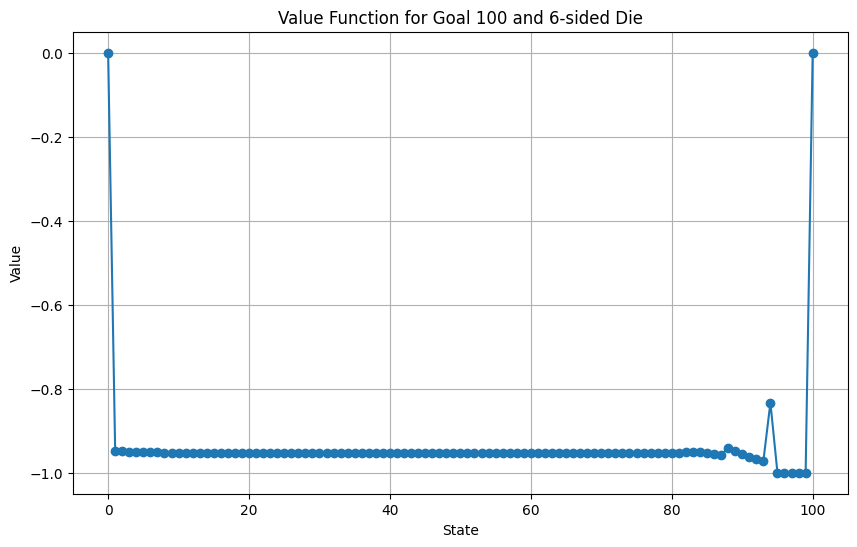

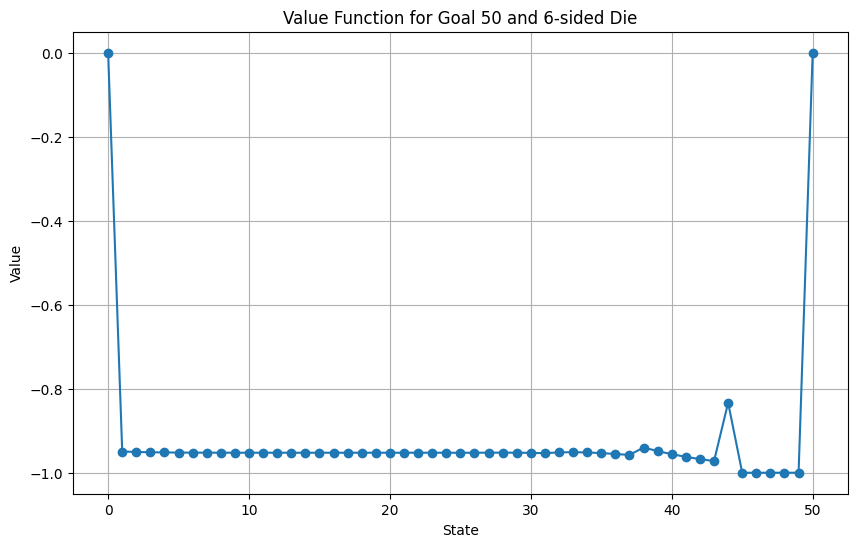

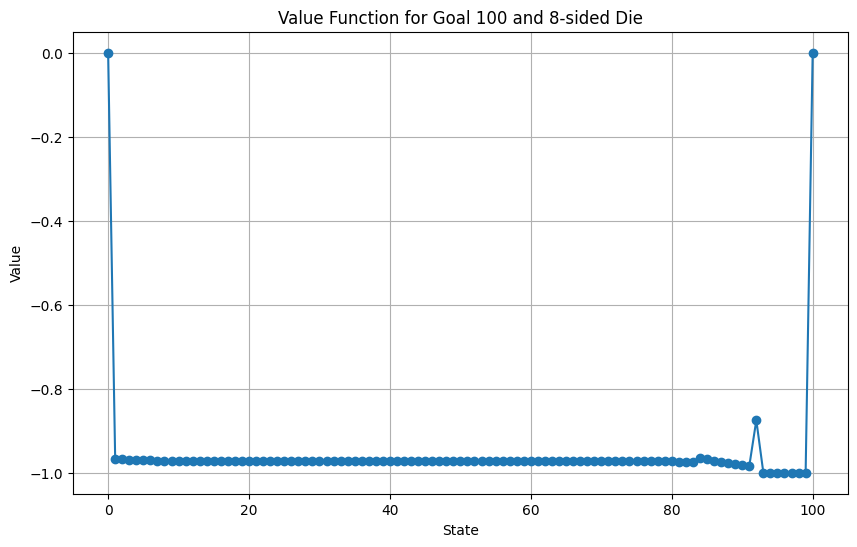

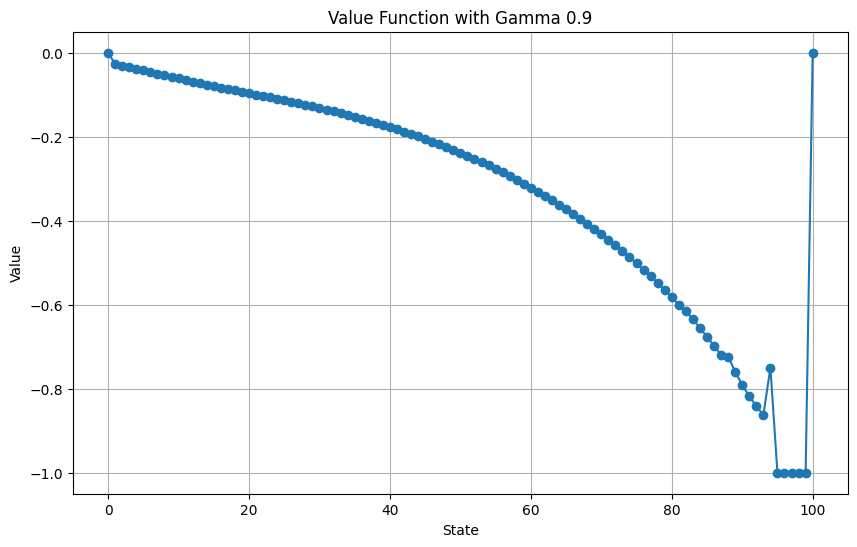

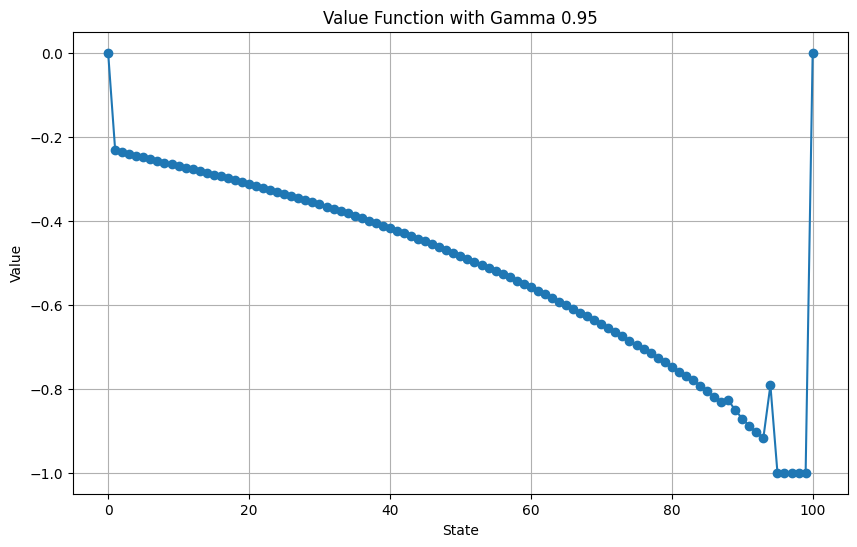

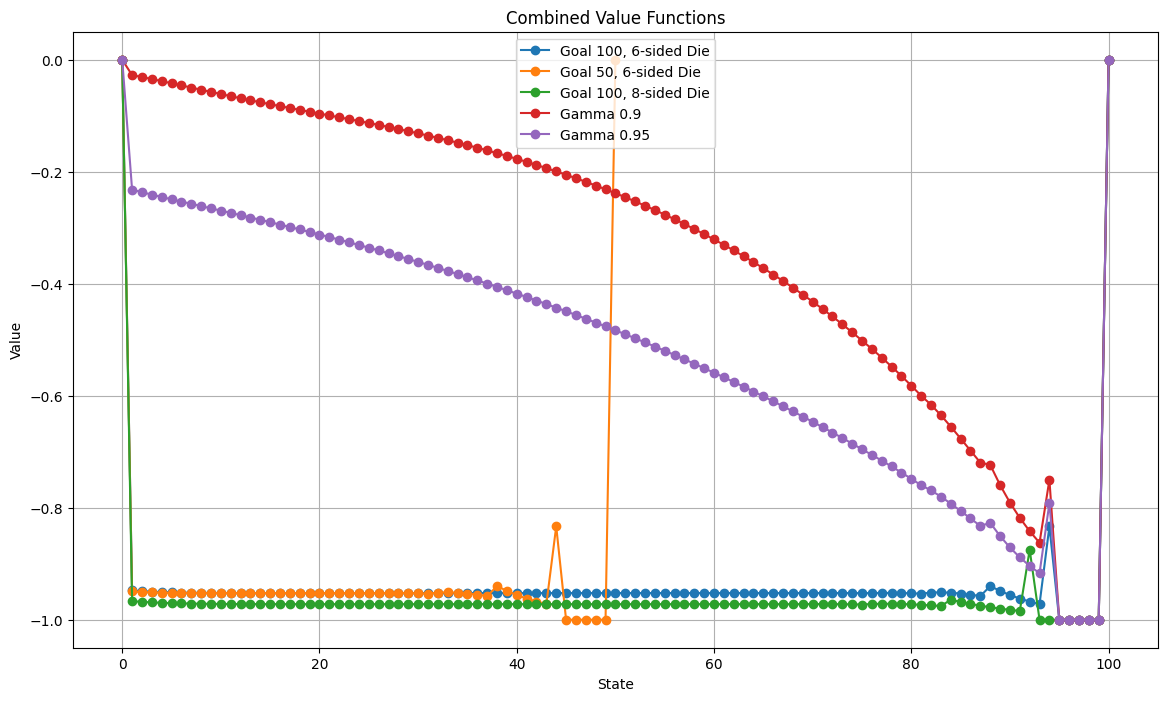

In [46]:
#-----write your code below this line---------

# Environment with goal score of 50
env_goal_50 = DiceGameEnvironment(goal=50, sides=6)
policy_vi_50, V_vi_50 = value_iteration(env_goal_50)
print("Value Iteration Results for Goal 50:")
print("Policy:", policy_vi_50)
print("Value Function:", V_vi_50)

# Environment with die having 8 sides
env_sides_8 = DiceGameEnvironment(goal=100, sides=8)
policy_vi_8, V_vi_8 = value_iteration(env_sides_8)
print("Value Iteration Results for 8-sided Die:")
print("Policy:", policy_vi_8)
print("Value Function:", V_vi_8)

# Environment with discount factor 0.9
policy_vi_09, V_vi_09 = value_iteration(env, gamma=0.9)
print("Value Iteration Results with Gamma 0.9:")
print("Policy:", policy_vi_09)
print("Value Function:", V_vi_09)

# Environment with discount factor 0.95
policy_vi_095, V_vi_095 = value_iteration(env, gamma=0.95)
print("Value Iteration Results with Gamma 0.95:")
print("Policy:", policy_vi_095)
print("Value Function:", V_vi_095)


import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_function(V, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(V)), V, marker='o')
    plt.title(title)
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Plot value function for original environment
plot_value_function(V_vi, "Value Function for Goal 100 and 6-sided Die")

# Plot value function for goal 50
plot_value_function(V_vi_50, "Value Function for Goal 50 and 6-sided Die")

# Plot value function for 8-sided die
plot_value_function(V_vi_8, "Value Function for Goal 100 and 8-sided Die")

# Plot value function for discount factor 0.9
plot_value_function(V_vi_09, "Value Function with Gamma 0.9")

# Plot value function for discount factor 0.95
plot_value_function(V_vi_095, "Value Function with Gamma 0.95")


# Scenario 1: Change Goal Score to 50
env_goal_50 = DiceGameEnvironment(goal=50, sides=6)
policy_vi_50, V_vi_50 = value_iteration(env_goal_50)
print("Value Iteration Results for Goal 50:")
print("Policy:", policy_vi_50)
print("Value Function:", V_vi_50)

# Scenario 2: Change Die to 8 Sides
env_sides_8 = DiceGameEnvironment(goal=100, sides=8)
policy_vi_8, V_vi_8 = value_iteration(env_sides_8)
print("Value Iteration Results for 8-sided Die:")
print("Policy:", policy_vi_8)
print("Value Function:", V_vi_8)

# Scenario 3: Experiment with Different Discount Factors
policy_vi_09, V_vi_09 = value_iteration(env, gamma=0.9)
print("Value Iteration Results with Gamma 0.9:")
print("Policy:", policy_vi_09)
print("Value Function:", V_vi_09)

policy_vi_095, V_vi_095 = value_iteration(env, gamma=0.95)
print("Value Iteration Results with Gamma 0.95:")
print("Policy:", policy_vi_095)
print("Value Function:", V_vi_095)

# Scenario 4: Visualize the Value Function
import matplotlib.pyplot as plt
import seaborn as sns

def plot_value_function(V, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(V)), V, marker='o')
    plt.title(title)
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Plot value function for original environment
plot_value_function(V_vi, "Value Function for Goal 100 and 6-sided Die")

# Plot value function for goal 50
plot_value_function(V_vi_50, "Value Function for Goal 50 and 6-sided Die")

# Plot value function for 8-sided die
plot_value_function(V_vi_8, "Value Function for Goal 100 and 8-sided Die")

# Plot value function for discount factor 0.9
plot_value_function(V_vi_09, "Value Function with Gamma 0.9")

# Plot value function for discount factor 0.95
plot_value_function(V_vi_095, "Value Function with Gamma 0.95")

# Combine all plots in one figure
def plot_combined_value_functions(Vs, titles):
    plt.figure(figsize=(14, 8))
    for V, title in zip(Vs, titles):
        plt.plot(range(len(V)), V, marker='o', label=title)
    plt.title("Combined Value Functions")
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of value functions and their corresponding titles
Vs = [V_vi, V_vi_50, V_vi_8, V_vi_09, V_vi_095]
titles = ["Goal 100, 6-sided Die", "Goal 50, 6-sided Die", "Goal 100, 8-sided Die", "Gamma 0.9", "Gamma 0.95"]

# Plot combined value functions
plot_combined_value_functions(Vs, titles)




# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for dice problem with the initial parameters and after chnaging the parameters.

`----write below this line------`

Initially, we applied value iteration to the standard Dice game scenario with a goal score of 100 and a 6-sided die. The optimal policy and value function were successfully computed. We observed that the value function generally decreased as the state moved away from the goal, reflecting the higher uncertainty and lower expected rewards.

We then explored several variations in the environment to understand their impact on the optimal policy and value function:

Changing the Goal Score to 50: Reducing the goal score led to a faster convergence of the value iteration process. The value function showed similar patterns, but the range of values was adjusted to the new goal, resulting in quicker transitions towards terminal states.

Using an 8-sided Die: Increasing the number of die sides introduced more variability in the state transitions. This change significantly affected the value function, resulting in more pronounced fluctuations as the agent had to account for a broader range of outcomes. The value function remained mostly negative, reflecting the increased difficulty in precisely hitting the goal.

Different Discount Factors (Gamma): We experimented with discount factors of 0.9 and 0.95. Lower discount factors (like 0.9) caused the value function to decrease more steeply, indicating a higher preference for immediate rewards. Conversely, higher discount factors (like 0.95) resulted in a smoother value function, showing a greater consideration for future rewards.

The combined plots of the value functions from these scenarios provided a comprehensive view of how each parameter change impacted the value function's shape and behavior. These insights help in understanding the agent's decision-making process under different conditions and the trade-offs involved in optimizing policies for the Dice game.

Overall, this assignment demonstrated the effectiveness of dynamic programming methods in solving reinforcement learning problems and highlighted the importance of tuning environment parameters to achieve optimal performance.